In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Carregamento do dataset (você pode substituir esta parte pelo seu próprio dataset)
df = pd.read_csv('sales_data.csv')

In [3]:
# Separação dos dados em treino e teste
X = df[['tempo_de_experiencia', 'numero_de_vendas', 'fator_sazonal']]
y = df['receita_em_reais']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [5]:
# Avaliação do Modelo Linear
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'MSE Linear: {mse_linear}, R² Linear: {r2_linear}')

MSE Linear: 4839044.565665032, R² Linear: -0.06596934817736022


In [6]:
# Regressão Polinomial
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [7]:
# Avaliação do Modelo Polinomial
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'MSE Polinomial: {mse_poly}, R² Polinomial: {r2_poly}')

MSE Polinomial: 3983443.60515465, R² Polinomial: 0.1225067829677211


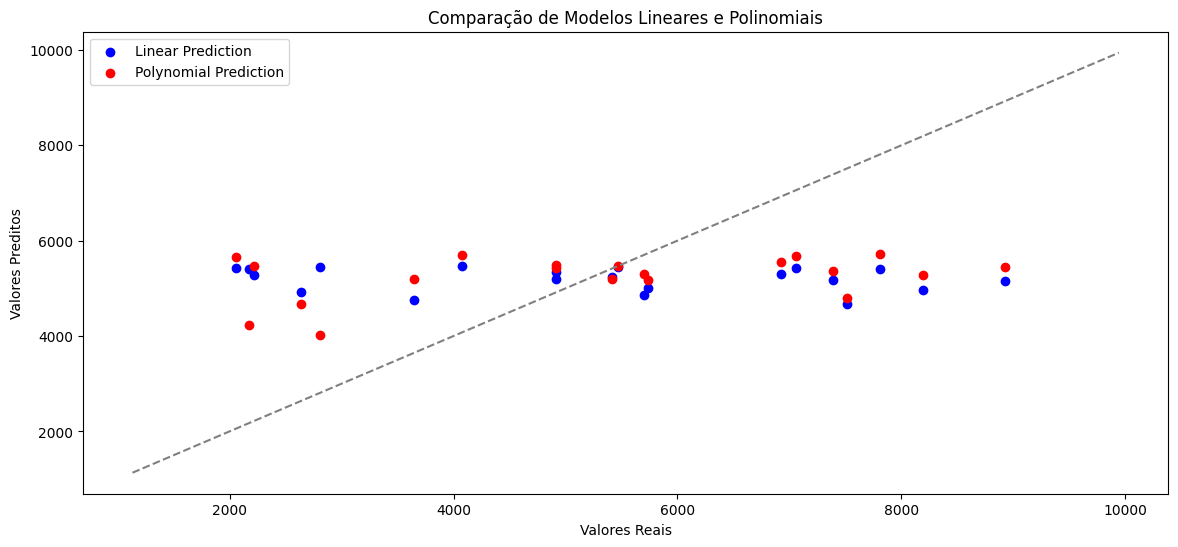

In [8]:
# Comparação Gráfica
plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Prediction')
plt.scatter(y_test, y_pred_poly, color='red', label='Polynomial Prediction')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação de Modelos Lineares e Polinomiais')
plt.legend()
plt.show()


In [12]:
# Valores para previsão (substitua pelos valores do vendedor específico)
tempo_de_experiencia = 37
numero_de_vendas = 29
fator_sazonal = 5

# Modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  # Use seus próprios dados de treinamento
receita_prevista_linear = linear_model.predict([[tempo_de_experiencia, numero_de_vendas, fator_sazonal]])

/home/irripc/Documents/workspace/regressao-polinominal/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
# Modelo de Regressão Polinomial
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)  # Use seus próprios dados de treinamento
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
X_test_poly = poly_features.transform([[tempo_de_experiencia, numero_de_vendas, fator_sazonal]])
receita_prevista_polinomial = poly_model.predict(X_test_poly)

/home/irripc/Documents/workspace/regressao-polinominal/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [14]:
print(f'Receita prevista (Modelo Linear): R$ {receita_prevista_linear[0]:.2f}')
print(f'Receita prevista (Modelo Polinomial): R$ {receita_prevista_polinomial[0]:.2f}')

Receita prevista (Modelo Linear): R$ 4965.05
Receita prevista (Modelo Polinomial): R$ 4828.85


In [15]:
# Defina os valores das variáveis para predição
tempo_de_experiencia_pred = 80  # meses de experiência
numero_de_vendas_pred = 150     # número de vendas
fator_sazonal_pred = 8          # fator sazonal

# Crie um array com os valores das variáveis para predição
X_new = np.array([[tempo_de_experiencia_pred, numero_de_vendas_pred, fator_sazonal_pred]])

# Predição usando Regressão Linear
y_pred_linear_new = linear_model.predict(X_new)
print(f'Predição com Regressão Linear para os valores (tempo de experiência={tempo_de_experiencia_pred}, '
      f'número de vendas={numero_de_vendas_pred}, fator sazonal={fator_sazonal_pred}): '
      f'Receita Estimada = R$ {y_pred_linear_new[0]:,.2f}')

# Transformação dos valores para Regressão Polinomial
X_new_poly = poly_features.transform(X_new)

# Predição usando Regressão Polinomial
y_pred_poly_new = poly_model.predict(X_new_poly)
print(f'Predição com Regressão Polinomial para os valores (tempo de experiência={tempo_de_experiencia_pred}, '
      f'número de vendas={numero_de_vendas_pred}, fator sazonal={fator_sazonal_pred}): '
      f'Receita Estimada = R$ {y_pred_poly_new[0]:,.2f}')

Predição com Regressão Linear para os valores (tempo de experiência=80, número de vendas=150, fator sazonal=8): Receita Estimada = R$ 5,818.14
Predição com Regressão Polinomial para os valores (tempo de experiência=80, número de vendas=150, fator sazonal=8): Receita Estimada = R$ 4,300.52


/home/irripc/Documents/workspace/regressao-polinominal/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/irripc/Documents/workspace/regressao-polinominal/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
